In [2]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

## 부산 특별시 기초구역도 - CCTV

부산 특별시 기초구역도

In [8]:
busan = './data/부산지리/LSMD_ADM_SECT_UMD_26_202309.shp'
busan = gpd.read_file(busan, encoding='cp949')
busan

,EMD_CD,COL_ADM_SE,EMD_NM,SGG_OID,geometry
0,26110101,26110,영주동,1284,"POLYGON ((385275.685 281902.116, 385279.622 28..."
1,26110102,26110,대창동1가,1285,"POLYGON ((385696.820 281127.267, 385697.633 28..."
2,26110103,26110,대창동2가,1286,"POLYGON ((385821.846 281409.033, 385819.940 28..."
3,26110104,26110,중앙동1가,1287,"POLYGON ((385624.962 280099.160, 385621.056 28..."
4,26110105,26110,중앙동2가,1288,"POLYGON ((385574.710 280212.769, 385555.836 28..."
...,...,...,...,...,...
187,26710250,26710,기장읍,2338,"MULTIPOLYGON (((396666.370 292532.686, 396682...."
188,26710253,26710,장안읍,1472,"POLYGON ((408081.317 305128.923, 408081.897 30..."
189,26710256,26710,정관읍,1473,"POLYGON ((400083.855 311042.168, 400132.606 31..."
190,26710259,26710,일광읍,2337,"MULTIPOLYGON (((403863.349 297993.077, 403865...."


In [9]:
busan = busan.to_crs(epsg=4326)
print(busan.crs) 

EPSG:4326


C:\Users\yujin\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 48512 (\N{HANGUL SYLLABLE BU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\yujin\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49328 (\N{HANGUL SYLLABLE SAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\yujin\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 53945 (\N{HANGUL SYLLABLE TEUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\yujin\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\yujin\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}

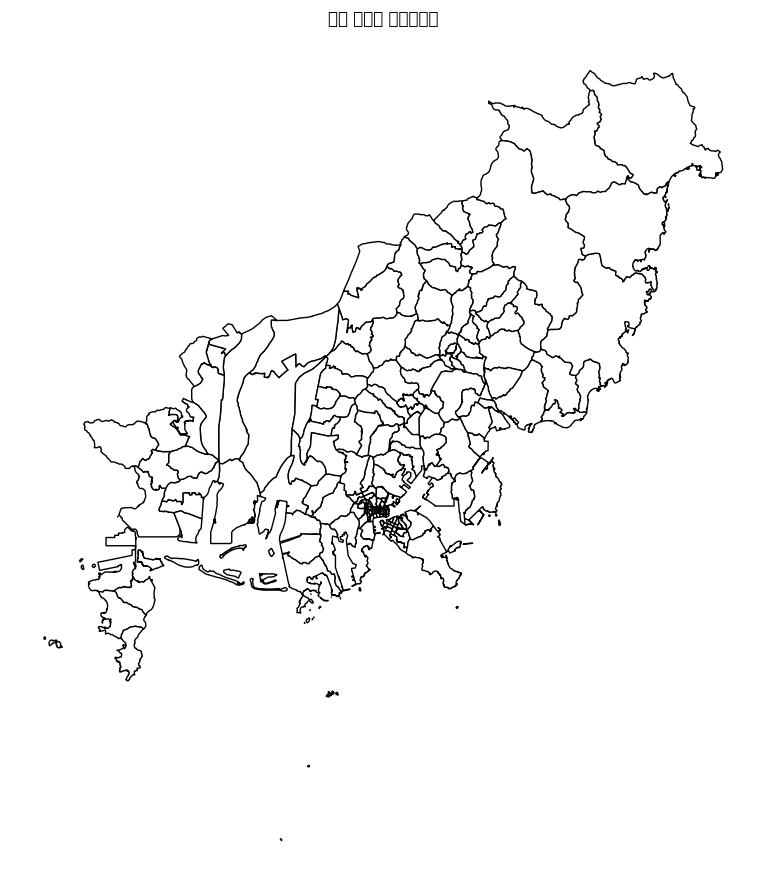

In [4]:
ax = busan.plot(figsize=(11, 11), color="w", edgecolor="k")
ax.set_title("부산 특별시 기초구역도")
ax.set_axis_off()
plt.show()

CCTV

In [5]:
busan_cctv = './data/tl_tracffic_cctv_info.shp'
cctv = gpd.read_file(busan_cctv, encoding='UTF-8')
cctv = cctv[['name','geometry']]
cctv

,name,geometry
0,센텀중,POINT (129.12399 35.17363)
1,수영1호교사거리,POINT (129.12561 35.16539)
2,수영2호교입구(민락),POINT (129.12813 35.15991)
3,하마정교차로,POINT (129.06778 35.17477)
4,송공(광장),POINT (129.06877 35.16923)
...,...,...
207,재반로-반여초교,POINT (129.13133 35.19874)
208,석대동 컨테이너 야적장,POINT (129.12977 35.22002)
209,송공삼거리,POINT (129.06695 35.16786)
210,거성사거리,POINT (129.06732 35.19109)


In [6]:
print(cctv.crs)

EPSG:4326


신고데이터(불법좌회전)

In [37]:
data = pd.read_excel('./data/불법좌회전_부산.xlsx')
data = data[['주소','경도','위도','EMD_NM']]
data

,주소,경도,위도,EMD_NM
0,부산광역시 부산진구 양정동 322번길,129.072358,35.176558,양정동
1,부산광역시 해운대구 송정동 451번길,129.201086,35.183910,송정동
2,부산광역시 부산진구 전포동 834번길,129.071515,35.153933,전포동
3,부산광역시 부산진구 전포동 336번길,129.068387,35.154525,전포동
4,부산광역시 연제구 연산동 1530번길,129.087269,35.185579,연산동
...,...,...,...,...
4638,부산광역시 강서구 명지동 2984번길,128.912755,35.089097,명지동
4639,부산광역시 영도구 남항동1가 232번길,129.039337,35.089226,남항동1가
4640,부산광역시 동래구 사직동 161번길,129.070428,35.200899,사직동
4641,부산광역시 해운대구 좌동 1390번길,129.168144,35.180199,좌동


In [53]:
a = data['EMD_NM'].value_counts().reset_index(name='count')
a.head(10)

,EMD_NM,count
0,명지동,286
1,연산동,196
2,우동,167
3,장전동,165
4,송정동,113
5,철마면,109
6,반송동,105
7,구서동,96
8,하단동,91
9,부전동,86


In [42]:
# A와 B 데이터프레임을 '읍면동' 및 'EMD_NM' 열을 기준으로 병합
result = busan.merge(a, on='EMD_NM', how='left')
result['count'] = result['count'].fillna(0)
result

,EMD_CD,COL_ADM_SE,EMD_NM,SGG_OID,geometry,count
0,26110101,26110,영주동,1284,"POLYGON ((129.03231 35.11643, 129.03235 35.116...",0.0
1,26110102,26110,대창동1가,1285,"POLYGON ((129.03675 35.10937, 129.03676 35.109...",0.0
2,26110103,26110,대창동2가,1286,"POLYGON ((129.03818 35.11188, 129.03816 35.111...",2.0
3,26110104,26110,중앙동1가,1287,"POLYGON ((129.03573 35.10012, 129.03569 35.100...",0.0
4,26110105,26110,중앙동2가,1288,"POLYGON ((129.03521 35.10115, 129.03500 35.101...",1.0
...,...,...,...,...,...,...
187,26710250,26710,기장읍,2338,"MULTIPOLYGON (((129.15971 35.21002, 129.15989 ...",79.0
188,26710253,26710,장안읍,1472,"POLYGON ((129.28816 35.32116, 129.28817 35.321...",62.0
189,26710256,26710,정관읍,1473,"POLYGON ((129.20172 35.37605, 129.20225 35.375...",68.0
190,26710259,26710,일광읍,2337,"MULTIPOLYGON (((129.24004 35.25776, 129.24006 ...",51.0


### 시각화

c:\Python\python310\lib\site-packages\mapclassify\classifiers.py:1592: UserWarning: Not enough unique values in array to form 10 classes. Setting k to 9.
  self.bins = quantile(y, k=k)


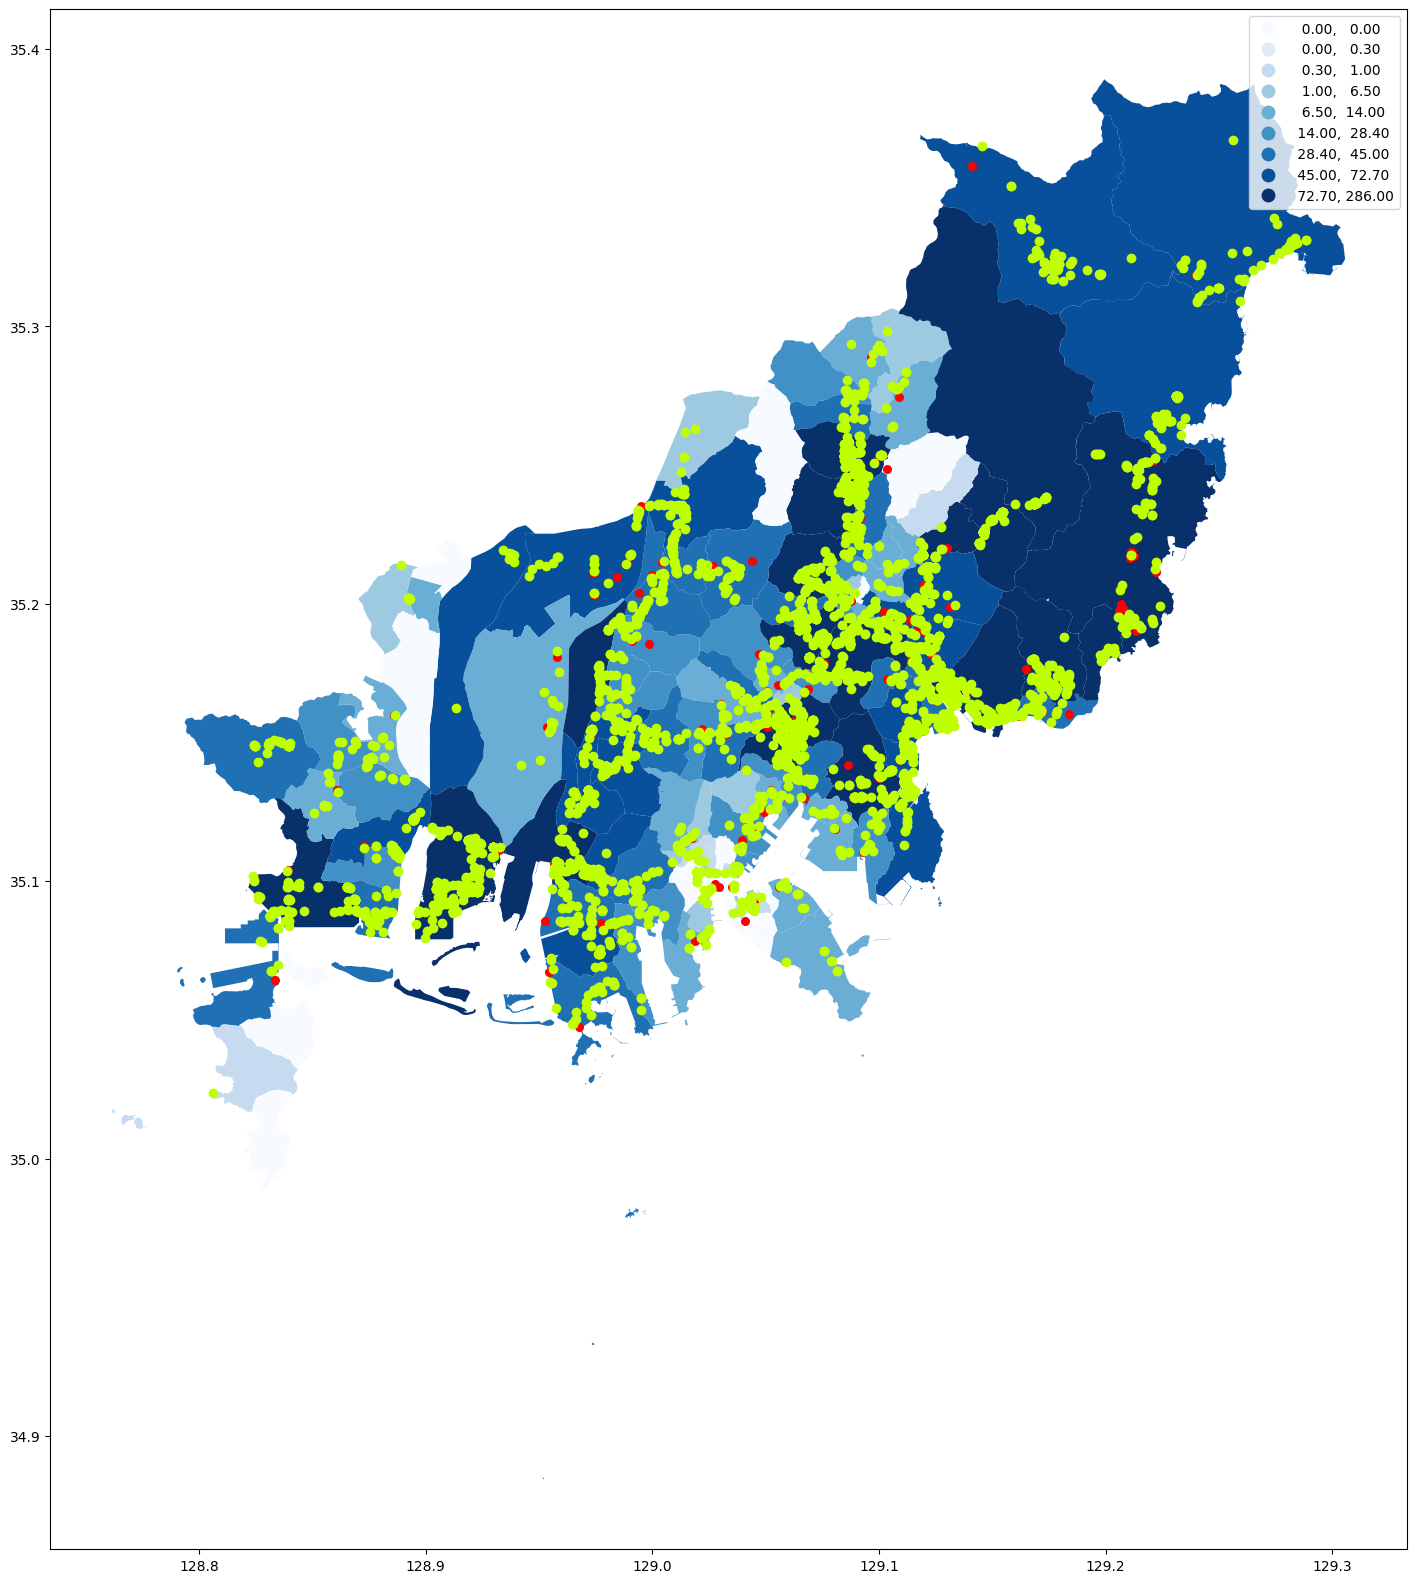

In [52]:
# result 데이터프레임을 사용하여 지도 시각화
ax = result.plot(figsize=(20, 20),column='count', legend=True, scheme='quantiles', cmap="Blues", k=10)
ax.set_axis_off()
ax.set_title("부산 지역별 신고건수")

plt.show()

C:\Users\yujin\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\yujin\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


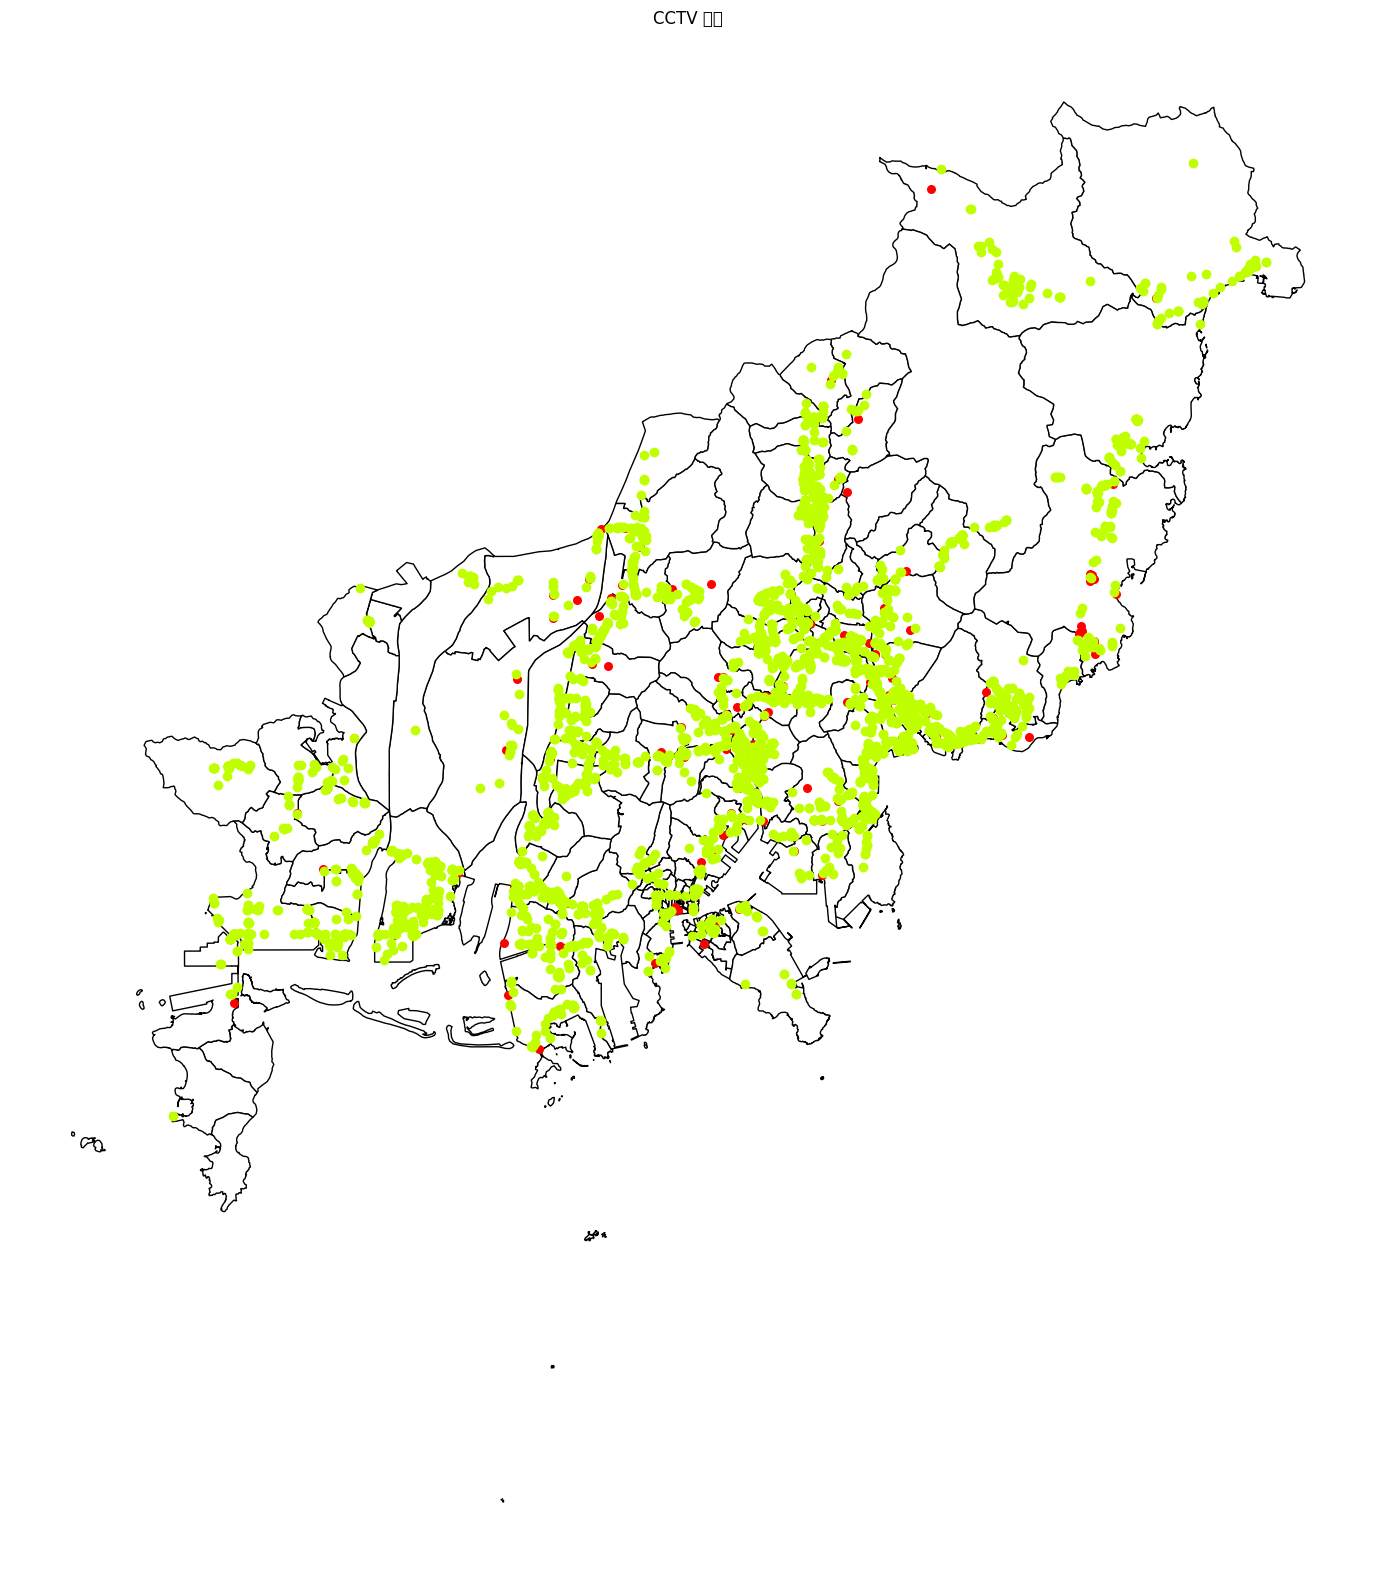

In [17]:
base = busan.plot(figsize=(20, 20), color="w", edgecolor="k")
ax = cctv.plot(ax=base, marker='o', color='red', markersize=30)
ax.scatter(data['경도'],data['위도'],color= "#bfff00",linewidths = 1) 
# ax = data.plot(ax=base, marker='o', color='red', markersize=10)
ax.set_axis_off()
ax.set_title("CCTV 분포")
plt.show()

## 도로분리대

In [4]:
road_divider = './data/도로분리대/Z_NGII_N3L_C0520000.shp'
road_divider = gpd.read_file(road_divider)
road_divider

,UFID,STRU,SCLS,FMTA,geometry
0,TRN0700000000001F,MSS002,NaN,NaN,"LINESTRING (1085852.585 1877523.848, 1085901.1..."
1,TRN0700000000002G,MSS002,NaN,NaN,"LINESTRING (1080142.144 1879810.959, 1080108.7..."
2,TRN0700000000003H,MSS003,NaN,NaN,"LINESTRING (1052785.654 1904001.758, 1052880.8..."
3,TRN0700000000004I,MSS002,NaN,NaN,"LINESTRING (1073784.086 1890413.575, 1073781.3..."
4,TRN0700000000005J,MSS002,NaN,NaN,"LINESTRING (1065890.151 1908151.546, 1065931.3..."
...,...,...,...,...,...
53316,TRN0700000001580S,MSS003,NaN,NaN,"LINESTRING (1168101.934 1714389.348, 1168099.2..."
53317,TRN0700000001581T,MSS003,NaN,NaN,"LINESTRING (1168087.428 1715013.070, 1168086.8..."
53318,TRN0700000001582U,MSS003,NaN,NaN,"LINESTRING (1167617.992 1718316.498, 1167611.7..."
53319,TRN0700000001583V,MSS003,NaN,NaN,"LINESTRING (1167552.164 1718605.853, 1167538.0..."


In [6]:
# 도로분리대 좌표계 달라서 변경
road_divider = road_divider.to_crs(epsg=4326)
print(road_divider.crs) 

EPSG:4326


In [14]:
# 도로 분리대 데이터 중에서 부산 지역에 해당하는 데이터만 필터링
road_divider_busan = road_divider[road_divider.intersects(busan.unary_union)]
road_divider_busan

C:\Users\yujin\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\yujin\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


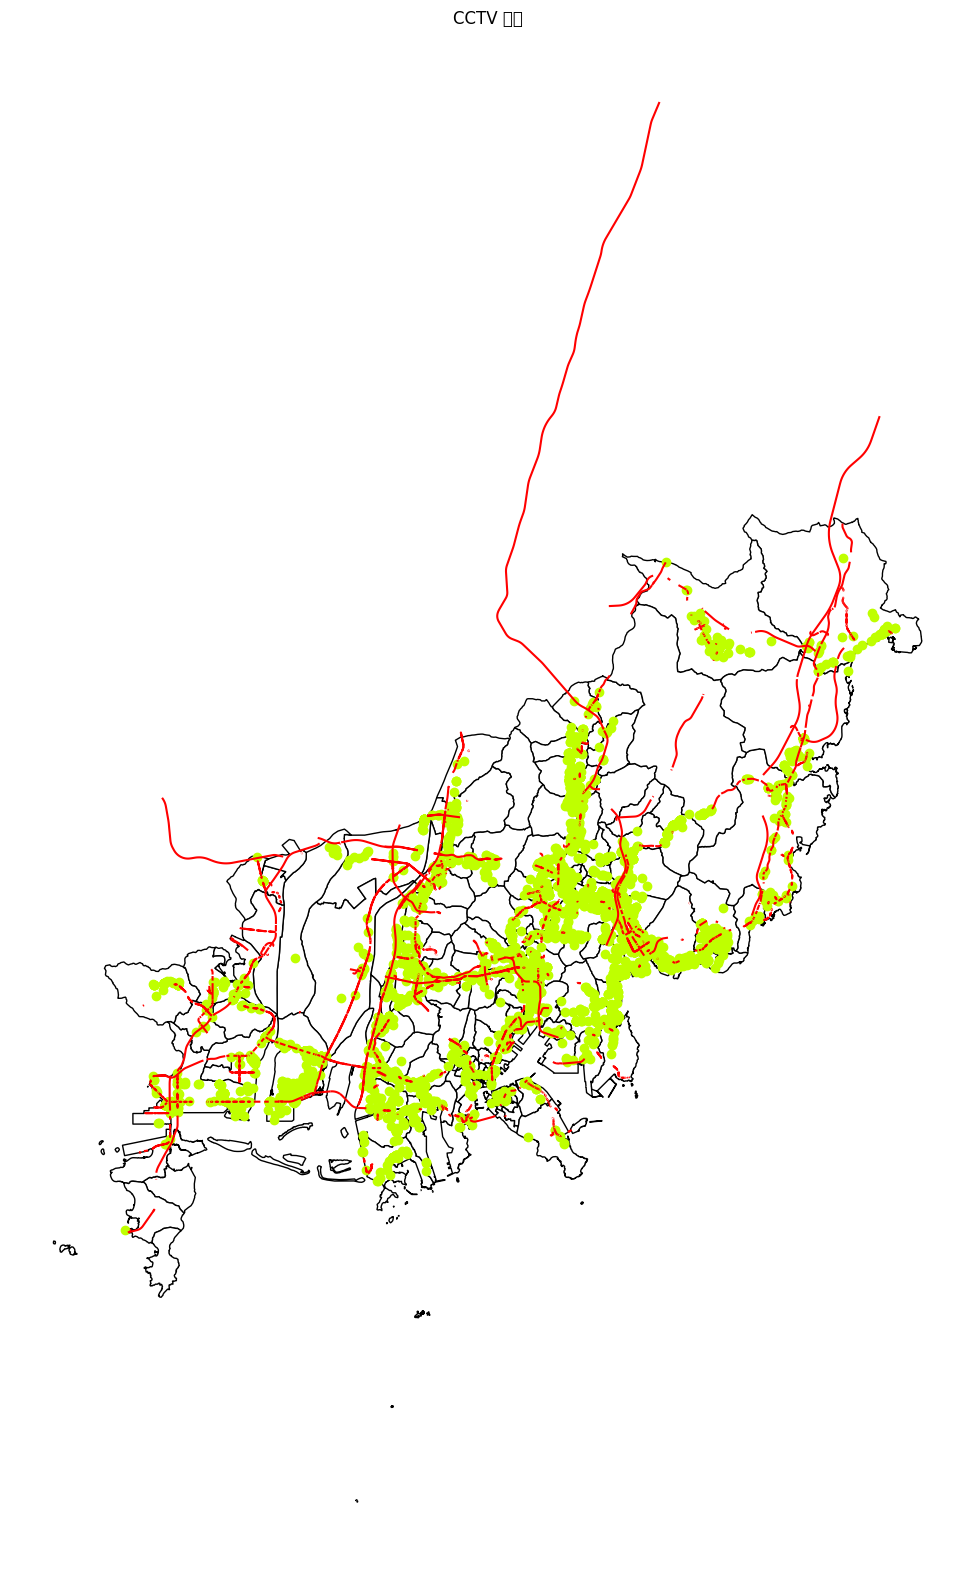

In [38]:
base = busan.plot(figsize=(20, 20), color="w", edgecolor="k") # 부산 지도
ax = road_divider_busan.plot(ax=base, marker='o', color='red', markersize=30)  # 도로분리대 추가
ax.scatter(data['경도'],data['위도'],color= "#bfff00",linewidths = 1)  # 불법좌회전 마커 추가

ax.set_axis_off()
ax.set_title("CCTV 분포")
plt.show()
ax.set_axis_off()
ax.set_title("부산 지역 도로 분리대 분포")
plt.show()

In [35]:
import geopandas as gpd
import folium

# 지도의 중심 좌표를 설정합니다. 이를 위해 GeoDataFrame의 중심 좌표를 계산
# center = [road_divider_busan['geometry'].centroid.y.mean(), road_divider_busan['geometry'].centroid.x.mean()]

busan_left = pd.read_excel('./data/불법좌회전_부산.xlsx')
busan_left_result = busan_left[['경도','위도','EMD_NM']]

# Folium 지도 생성
m = folium.Map(location=[road_divider_busan['geometry'].centroid.y.mean(), road_divider_busan['geometry'].centroid.x.mean()], zoom_start=15)

# GeoDataFrame을 Folium 지도에 그리기
for idx, row in road_divider_busan.iterrows():
    folium.GeoJson(row['geometry'], name=row['UFID']).add_to(m)

# 불법 좌회전 데이터 포인트를 지도에 추가
# for index, row in busan_left_result.iterrows():
#     id = row['EMD_NM']
#     lat = row['위도']
#     lng = row['경도']
#     folium.Marker(location=[lat, lng], popup=f'ID: {id}').add_to(m)

m

C:\Users\yujin\AppData\Local\Temp\ipykernel_6216\934711773.py:11: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  m = folium.Map(location=[road_divider_busan['geometry'].centroid.y.mean(), road_divider_busan['geometry'].centroid.x.mean()], zoom_start=15)
